In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline
plt.style.use("fivethirtyeight")

In [5]:
import cv2

cap = cv2.VideoCapture('HeiderSimmelAnimation.mp4')
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

1800.0


In [3]:
a = np.array([[[5, 5, 5, 5], [5, 5, 5, 5]]])
b = np.array([[[2, 2, 2, 2], [1, 1, 1, 1]]])

# np.sum(a, b)

In [20]:
np.arange(0, 485, 485/3)

342 + 342 + 342

1026

In [3]:
def motionEnergySegmenter(frame):
    # Frame split to 9 segments
    # Horizontal split: (0, 215), (215, 428), (428, 640)
    # Vertical split:   (0, 160), (160, 320), (320, 480)

    hstop = [342, 648, 1024]
    vstop = [256, 512, 768]

    # fig, ax = plt.subplots(3, 3, figsize=(20, 15))

    segArr = list()
    vPrev = 0
    for i, v in enumerate(vstop):
        hPrev = 0
        for j, h in enumerate(hstop):
            segFrame = frame[vPrev: v, hPrev: h]
            segArr.append(np.sum(segFrame))
            # print(vPrev, v)
            # print(hPrev, h)
            # print(len(segFrame[1]))
            # ax[i, j].imshow(segFrame)

            hPrev = h
        vPrev = v
    # plt.show()
    return segArr
   

In [95]:
# frame = cap.read()[1]
# dim = (len(frame[0]), len(frame))
cap = cv2.VideoCapture('Edited/PBJ.mp4')
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

success, pframe = cap.read()
motionArr = list()
while success:
    success, frame = cap.read()
    if not success:
        break
    diffFrame = np.subtract(pframe, frame)
    # plt.imshow(diffFrame)
    motionArr.append(motionEnergySegmenter(diffFrame))
    # break
    
print(len(motionArr))


2623.0
2622


In [96]:
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

(width, height)

(1024.0, 768.0)

In [97]:
def findGrid(x, y):
    # hstop = [342, 648, 1024]
    # vstop = [256, 512, 768]
    #print(x, y)
    # Grid 1
    if x <= 342 and y <= 256:
        return 1
    # Grid 2
    elif 342 < x <= 648 and y <= 256:
        return 2
    # Grid 3
    elif x > 648 and y <= 256:
        return 3

    # Grid 4
    elif x <= 342 and 256 < y <= 512:
        return 4
    # Grid 5
    elif 342 < x <= 648 and 256 < y <= 512:
        return 5
    # Grid 6
    elif x > 648 and 256 < y <= 512:
        return 6

    # Grid 7
    elif x <= 342 and y > 512:
        return 7
    # Grid 8
    elif 342 < x <= 648 and y > 512:
        return 8
    # Grid 9
    elif x > 648 and y > 512:
        return 9
    


In [98]:
df = pd.read_csv("Data/Brendan.csv")
df = df[df["VIDEO_NAME_START"] == "PBJ.mp4"].copy()

df.reset_index(inplace=True)

df["CURRENT_FIX_START"] /= 1000
df["CURRENT_FIX_END"] /= 1000
df["GridLoc"] = 0
for i in range(df.shape[0]):
    df.loc[i, "GridLoc"] = findGrid(df.loc[i, "CURRENT_FIX_X"], df.loc[i, "CURRENT_FIX_Y"])

df

    

,index,RECORDING_SESSION_LABEL,TRIAL_INDEX,CURRENT_FIX_DURATION,CURRENT_FIX_PUPIL,CURRENT_FIX_START,CURRENT_FIX_END,CURRENT_FIX_X,CURRENT_FIX_Y,EYE_USED,NEXT_SAC_DURATION,TRIAL_FIXATION_TOTAL,TRIAL_START_TIME,VIDEO_FRAME_INDEX_START,VIDEO_NAME_START,IP_START_TIME,IP_END_TIME,__duration__1,GridLoc
0,189,Brendan,2,48,192,0.004,0.048,477.0,314.3,RIGHT,16,189,9753766,.,PBJ.mp4,9753766,9840891,87000,5
1,190,Brendan,2,104,197,0.068,0.168,561.7,344.4,RIGHT,24,189,9753766,.,PBJ.mp4,9753766,9840891,87000,5
2,191,Brendan,2,132,203,0.196,0.324,503.0,350.6,RIGHT,40,189,9753766,4,PBJ.mp4,9753766,9840891,87000,5
3,192,Brendan,2,560,228,0.368,0.924,493.1,180.1,RIGHT,16,189,9753766,9,PBJ.mp4,9753766,9840891,87000,2
4,193,Brendan,2,408,233,0.944,1.348,527.3,193.3,RIGHT,60,189,9753766,26,PBJ.mp4,9753766,9840891,87000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,373,Brendan,2,436,309,84.600,85.032,432.7,435.3,RIGHT,52,189,9753766,2536,PBJ.mp4,9753766,9840891,87000,5
185,374,Brendan,2,948,277,85.088,86.032,458.3,188.8,RIGHT,16,189,9753766,2551,PBJ.mp4,9753766,9840891,87000,2
186,375,Brendan,2,312,254,86.052,86.360,438.0,159.4,RIGHT,60,189,9753766,2579,PBJ.mp4,9753766,9840891,87000,2
187,376,Brendan,2,276,242,86.424,86.696,388.2,472.1,RIGHT,44,189,9753766,2591,PBJ.mp4,9753766,9840891,87000,5


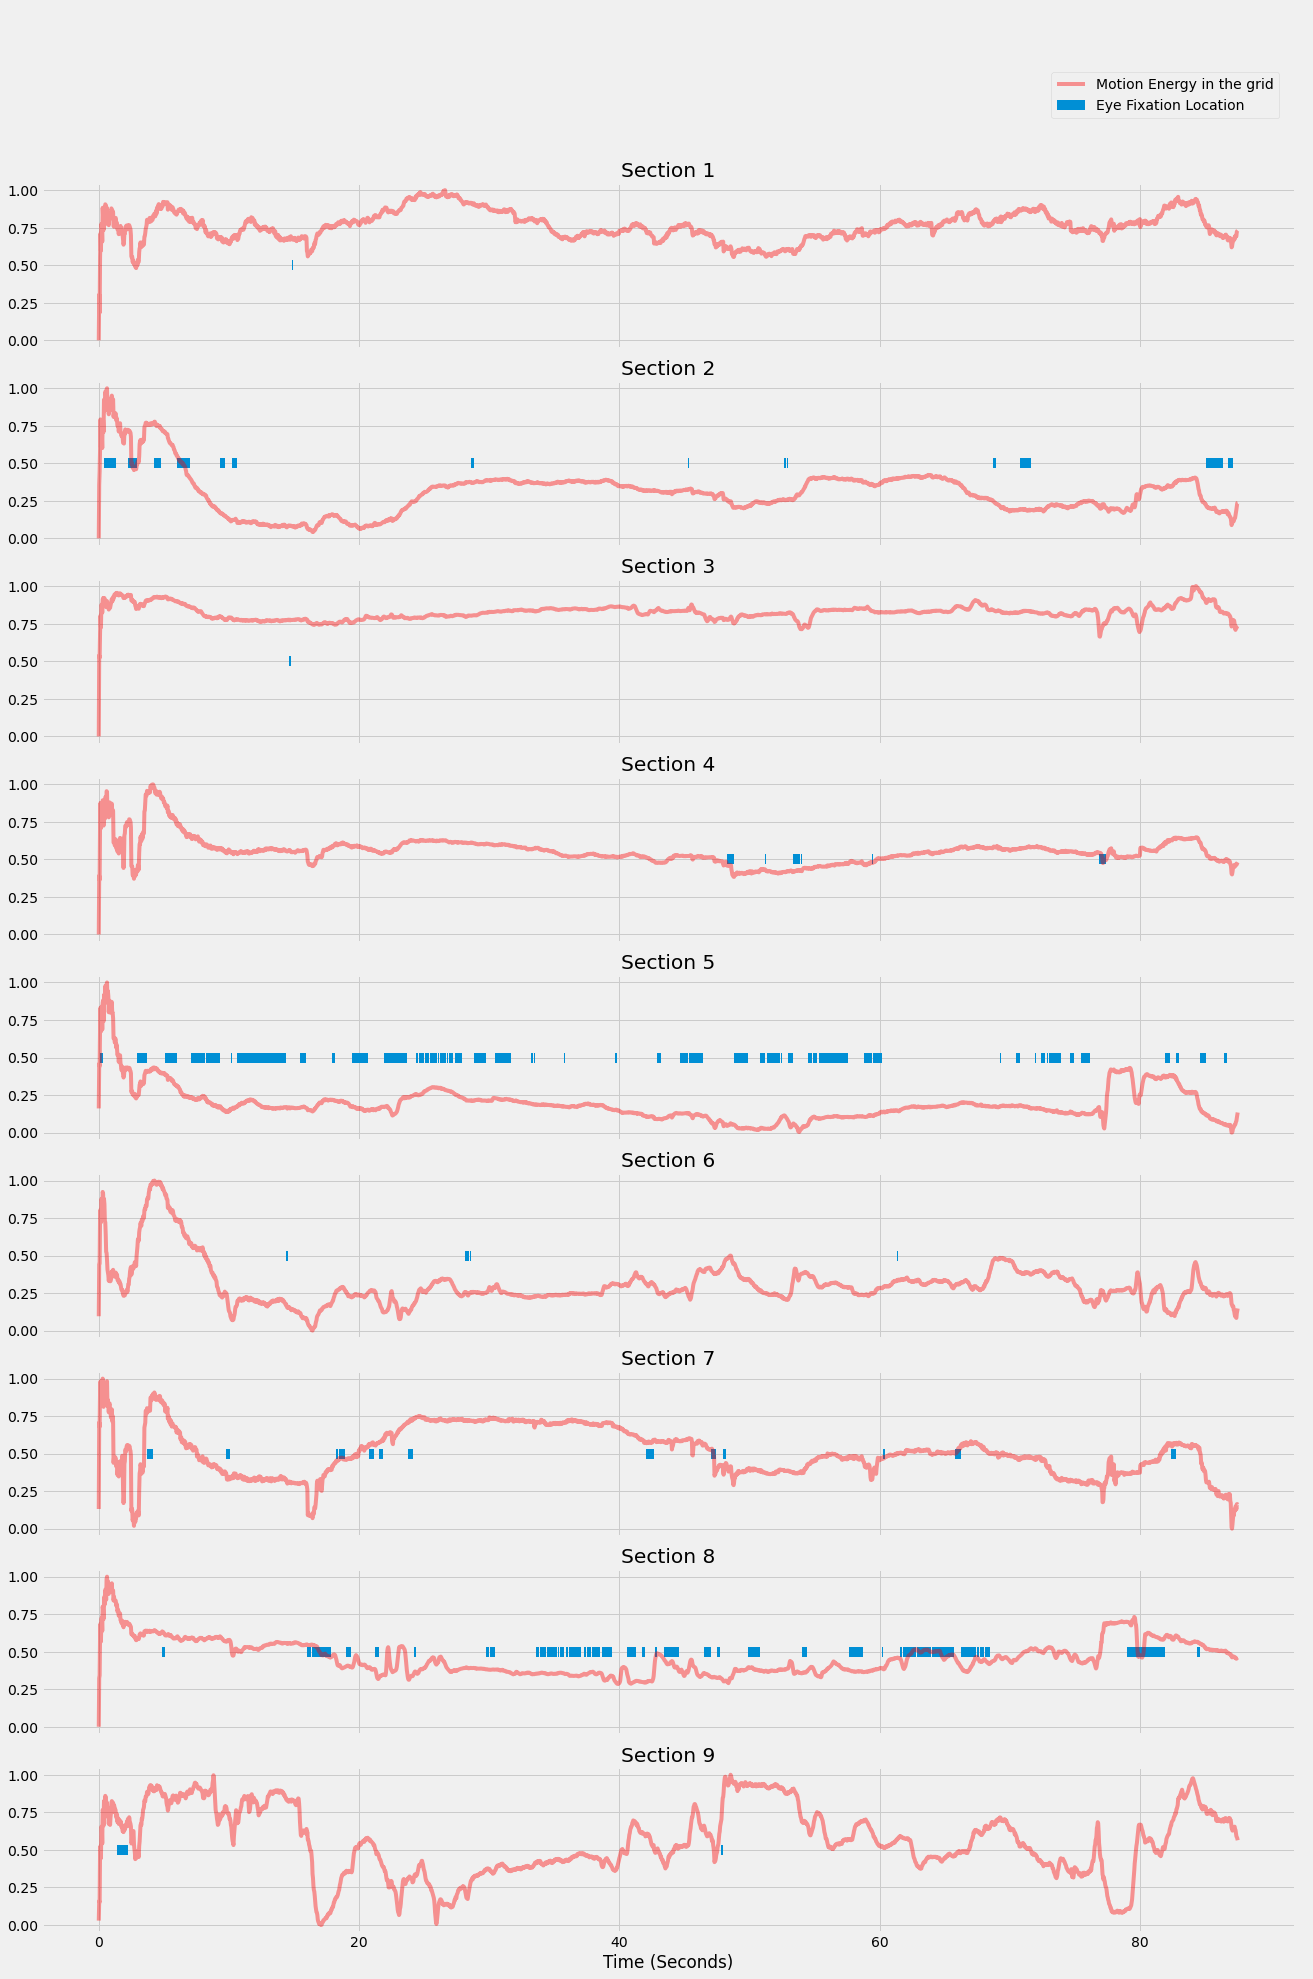

In [99]:
fig, ax = plt.subplots(9, 1, sharex=True, figsize=(20, 30))

for i in range(9):
    temp = [x[i] for x in motionArr]

    mx, mn = max(temp), min(temp) 
    tempScaled = [(x - mn) / (mx - mn) for x in temp]

    ax[i].plot(np.arange(0, duration, (duration/(frame_count - 1))), tempScaled, "r", alpha=0.4, 
            label="Motion Energy in the grid")
    ax[i].set_title("Section "+ str(i + 1))

    
for i in range(df.shape[0]):
    grid = df.loc[i, "GridLoc"]
    x1, x2 = df.loc[i, "CURRENT_FIX_START"] - 0.004, df.loc[i, "CURRENT_FIX_END"]
    y = 0.5
    ax[grid-1].hlines(y, x1, x2, lw=10, label="Eye Fixation Location")

ax[8].set_xlabel("Time (Seconds)")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc=(0.8, 0.94))
#fig.suptitle("V")
plt.show()
#temp

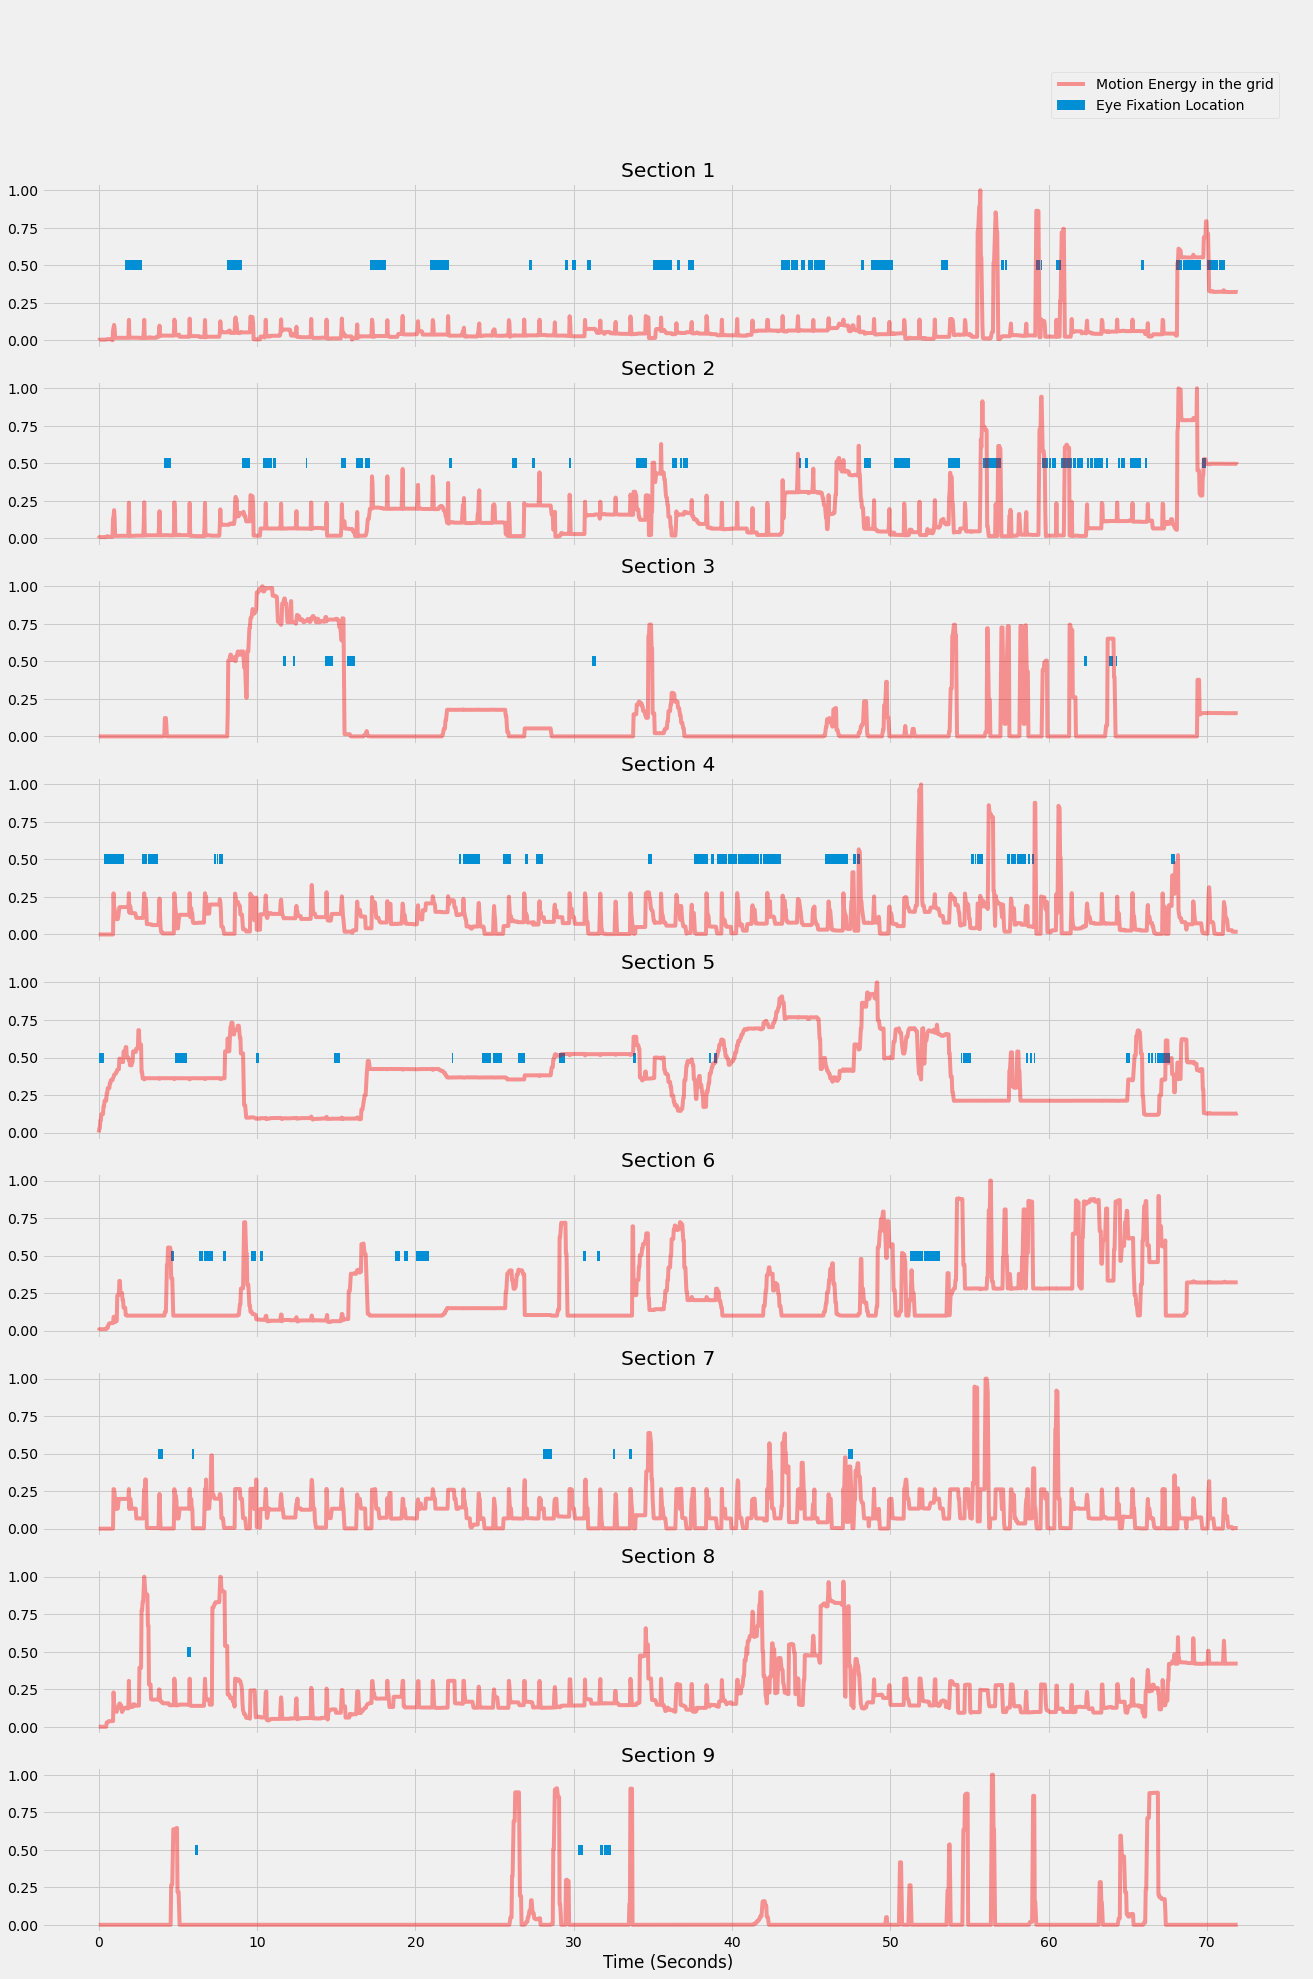

In [100]:
cap = cv2.VideoCapture('Edited/HandS.mp4')

success, pframe = cap.read()
motionArr = list()
while success:
    success, frame = cap.read()
    if not success:
        break
    diffFrame = np.subtract(pframe, frame)
    # plt.imshow(diffFrame)
    motionArr.append(motionEnergySegmenter(diffFrame))
    # break
    
fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps

width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

df = pd.read_csv("Data/Brendan.csv")
df = df[df["VIDEO_NAME_START"] == "HandS.mp4"].copy()

df.reset_index(inplace=True)

df["CURRENT_FIX_START"] /= 1000
df["CURRENT_FIX_END"] /= 1000
df["GridLoc"] = 0
for i in range(df.shape[0]):
    df.loc[i, "GridLoc"] = findGrid(df.loc[i, "CURRENT_FIX_X"], df.loc[i, "CURRENT_FIX_Y"])

fig, ax = plt.subplots(9, 1, sharex=True, figsize=(20, 30))

for i in range(9):
    temp = [x[i] for x in motionArr]

    mx, mn = max(temp), min(temp) 
    tempScaled = [(x - mn) / (mx - mn) for x in temp]

    ax[i].plot(np.arange(0, duration, (duration/(frame_count - 1))), tempScaled, "r", alpha=0.4, 
            label="Motion Energy in the grid")
    ax[i].set_title("Section "+ str(i + 1))

    
for i in range(df.shape[0]):
    grid = df.loc[i, "GridLoc"]
    x1, x2 = df.loc[i, "CURRENT_FIX_START"] - 0.004, df.loc[i, "CURRENT_FIX_END"]
    y = 0.5
    ax[grid-1].hlines(y, x1, x2, lw=10, label="Eye Fixation Location")

ax[8].set_xlabel("Time (Seconds)")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc=(0.8, 0.94))
#fig.suptitle("V")
plt.show()
#temp